# WATER POTABILITY ML MODEL

#### IMPORTING LIBRARIES
- pandas for data manipulations
- numpy for matrix and mathematical operations
- seaborn for visualization
- matplotlib.pyplot for plotting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### IMPORTING DATASET

In [2]:
df = pd.read_csv('Datasets/water_potability.csv')

#### DATA EXPOLARATION

##### Gaining Insight into data

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

##### Treating Missing values

In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

All samples with missing values are dropped

In [9]:
df.dropna(inplace=True)

##### Checking Dataset After Treating Missing Values

In [10]:
df.shape

(2011, 10)

In [11]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [13]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [14]:
df['Potability'].value_counts()

Potability
0    1200
1     811
Name: count, dtype: int64

#### Checking for correlation between features

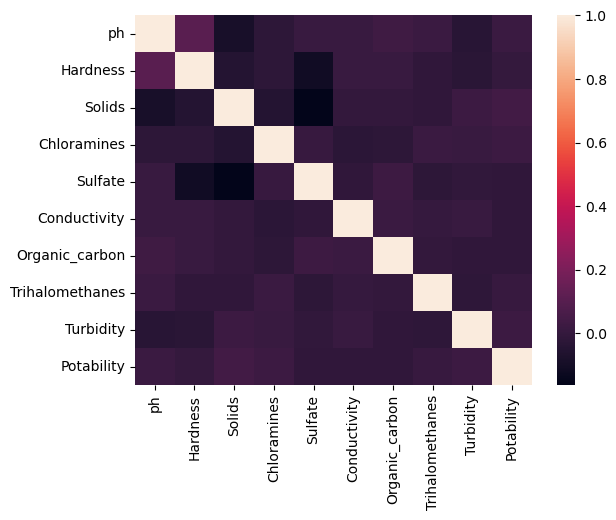

In [15]:
sns.heatmap(df.corr());

##### Splitting Data into training and test sets

In [16]:
X = df.drop(columns=['Potability'])

In [17]:
y = df['Potability']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [20]:
X_train.shape

(1407, 9)

In [21]:
X_test.shape

(604, 9)

#### BUILDING LOGISTIC REGRESSION MODEL

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [24]:
# get the mean and variance for each feature to standardize them
scaler = StandardScaler().fit(X_train)

In [25]:
# Standardize the features
X_train_scaled = scaler.transform(X_train)

In [26]:
X_train_scaled[1:5,:]

array([[-1.15728608, -0.03948124, -0.0073656 , -0.53829585,  0.61824864,
        -0.87669219, -0.0548057 , -2.03238992,  0.75042647],
       [-1.23903154, -0.47519356, -0.36738066, -1.21842581,  1.63050606,
         0.74561629, -0.09150465,  0.59091871,  0.45709337],
       [-0.37456612,  1.02434297,  0.07354693,  3.42229933, -3.42789853,
         0.67395157, -1.32007266,  0.0223093 ,  0.83387631],
       [-1.15661515, -1.05547059, -1.45583563,  1.3432697 ,  0.60486566,
         0.489841  , -0.94713758,  0.0830305 , -0.55867231]])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# Logistic Regression Model for binary classification
lin_model = LogisticRegression().fit(X_train_scaled,y_train)

In [29]:
# predict on test set
y_pred = lin_model.predict(scaler.transform(X_test))

In [30]:
# predict on training set
y_train_pred = lin_model.predict(X_train_scaled)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
# Check accuracy on test set prediction
accuracy_score(y_test,y_pred)

0.5993377483443708

In [33]:
# Check accuracy on training set prediction
accuracy_score(y_train_pred,y_train)

0.59772565742715

In [34]:
lin_model.coef_

array([[ 0.04149124, -0.06613098,  0.06052641,  0.01311641, -0.01394628,
        -0.07493534,  0.00275986,  0.02673551,  0.03070306]])

##### Result Analysis
The result of the logistic regression model is very poor. Low accuracy from both training and test data indicates underfitting

#### INCREASING THE DEGREE FOR MORE FLEXIBILITY

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [50]:
X_scaled_full = StandardScaler().fit_transform(X)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LogisticRegression('none',**kwargs))

In [53]:
from sklearn.model_selection import validation_curve

In [54]:
degree = np.arange(1,7)

In [55]:
# This block of code takes time to run
# This block of code checks for the optimum degree for the features
train_score, val_score = validation_curve(PolynomialRegression(max_iter=10000),
                                          X_scaled_full,y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree,cv=5)

In [56]:
np.median(train_score,1)

array([0.6003729 , 0.70167806, 0.75947794, 1.        , 1.        ,
       1.        ])

In [57]:
np.median(val_score,1)

array([0.59701493, 0.6641791 , 0.62935323, 0.5707196 , 0.57711443,
       0.60696517])

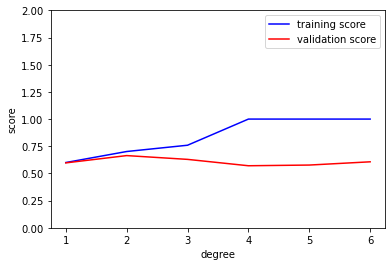

In [58]:
plt.plot(degree,np.median(train_score,1),'b',label='training score')
plt.plot(degree,np.median(val_score,1),'r',label='validation score')
plt.legend(loc='best')
plt.ylim(0, 2)
plt.xlabel('degree')
plt.ylabel('score');

The graph above shows that the model improves until degree 2 then start to diminish indicating overfitting

However, the best degree still indicates underfitting. This mean that other approaches need to be employed. This can be either do more data engineering or using a different model entirely

##### Taking a Look at the Predicted Outputs

In [59]:
y_pred[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
y_train_pred[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [61]:
y_test.value_counts()

0    361
1    243
Name: Potability, dtype: int64

In [62]:
y_train.value_counts()

0    839
1    568
Name: Potability, dtype: int64

#### BUILDING NEURAL NETWORK MODEL

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [64]:
from sklearn.metrics import accuracy_score, f1_score

In [65]:
norm = tf.keras.layers.Normalization(axis=-1)
norm.adapt(X_train)
Xn = norm(X_train)

In [66]:
lamdas = [0.0, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
44/44 [==============================] - 2s 4ms/step - loss: 0.6521
Epoch 2/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6103
Epoch 3/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5824
Epoch 4/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5641
Epoch 5/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5643
Epoch 6/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5480
Epoch 7/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5413
Epoch 8/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5258
Epoch 9/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5155
Epoch 10/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.4890
Epoch 11/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.4841
Epoch 12/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.4732
Epoch 13/1000
44/44 [====

44/44 [==============================] - 0s 4ms/step - loss: 0.1308
Epoch 102/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.1344
Epoch 103/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.1506
Epoch 104/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.1149
Epoch 105/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.1007
Epoch 106/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0781
Epoch 107/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0603
Epoch 108/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0672
Epoch 109/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0716
Epoch 110/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0635
Epoch 111/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0502
Epoch 112/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0462
Epoch 113/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.0453
Epoch 298/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0452
Epoch 299/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0455
Epoch 300/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0457
Epoch 301/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 302/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.1288
Epoch 303/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.2316
Epoch 304/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2515
Epoch 305/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.1636
Epoch 306/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.1225
Epoch 307/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.1422
Epoch 308/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.1426
Epoch 309/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 494/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 495/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 496/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 497/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 498/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 499/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 500/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 501/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 502/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 503/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 504/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 505/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 690/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 691/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 692/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 693/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 694/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 695/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 696/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 697/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 698/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 699/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 700/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 701/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 886/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 887/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 888/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 889/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 890/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 891/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 892/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 893/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 894/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 895/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 896/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 897/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.0836
Epoch 83/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0822
Epoch 84/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0812
Epoch 85/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0821
Epoch 86/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0855
Epoch 87/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.2515
Epoch 88/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.7206
Epoch 89/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6306
Epoch 90/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.4778
Epoch 91/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.4043
Epoch 92/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.3219
Epoch 93/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2995
Epoch 94/1000
44/44 [=========

44/44 [==============================] - 0s 4ms/step - loss: 0.0858
Epoch 182/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0843
Epoch 183/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0833
Epoch 184/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0819
Epoch 185/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0810
Epoch 186/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0798
Epoch 187/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0788
Epoch 188/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0779
Epoch 189/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0767
Epoch 190/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0756
Epoch 191/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0747
Epoch 192/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0751
Epoch 193/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.7701
Epoch 378/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.4757
Epoch 379/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.3522
Epoch 380/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2784
Epoch 381/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.2402
Epoch 382/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.2039
Epoch 383/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2064
Epoch 384/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.1833
Epoch 385/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.1555
Epoch 386/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.1467
Epoch 387/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.1173
Epoch 388/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.1068
Epoch 389/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.0775
Epoch 574/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0764
Epoch 575/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0753
Epoch 576/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0744
Epoch 577/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0735
Epoch 578/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0726
Epoch 579/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0720
Epoch 580/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0720
Epoch 581/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0767
Epoch 582/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0914
Epoch 583/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.1380
Epoch 584/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2786
Epoch 585/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.0703
Epoch 770/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0696
Epoch 771/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0690
Epoch 772/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0685
Epoch 773/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0678
Epoch 774/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0677
Epoch 775/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0669
Epoch 776/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0664
Epoch 777/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0657
Epoch 778/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0655
Epoch 779/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.1114
Epoch 780/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.3944
Epoch 781/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.1113
Epoch 966/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0986
Epoch 967/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0923
Epoch 968/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0905
Epoch 969/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0897
Epoch 970/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0820
Epoch 971/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0829
Epoch 972/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0823
Epoch 973/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 974/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0757
Epoch 975/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0820
Epoch 976/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0774
Epoch 977/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.3738
Epoch 164/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.3665
Epoch 165/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.3302
Epoch 166/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.3330
Epoch 167/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.3329
Epoch 168/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.3532
Epoch 169/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.3181
Epoch 170/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.3137
Epoch 171/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2991
Epoch 172/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.3062
Epoch 173/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2907
Epoch 174/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.3031
Epoch 175/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.2707
Epoch 360/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2677
Epoch 361/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2665
Epoch 362/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2585
Epoch 363/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2436
Epoch 364/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2404
Epoch 365/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2505
Epoch 366/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2393
Epoch 367/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2344
Epoch 368/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2399
Epoch 369/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2502
Epoch 370/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.3155
Epoch 371/1000
44/4

44/44 [==============================] - 0s 4ms/step - loss: 0.4426
Epoch 556/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.5508
Epoch 557/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5320
Epoch 558/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.4587
Epoch 559/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.3952
Epoch 560/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.3137
Epoch 561/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.3021
Epoch 562/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.3251
Epoch 563/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.3052
Epoch 564/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.3310
Epoch 565/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.3312
Epoch 566/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.3298
Epoch 567/1000
44/4

44/44 [==============================] - 0s 4ms/step - loss: 0.4368
Epoch 752/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.4161
Epoch 753/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.3263
Epoch 754/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.2857
Epoch 755/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.2762
Epoch 756/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.2619
Epoch 757/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.2775
Epoch 758/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.2817
Epoch 759/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.2630
Epoch 760/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.2350
Epoch 761/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.2301
Epoch 762/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.2110
Epoch 763/1000
44/4

44/44 [==============================] - 0s 4ms/step - loss: 0.2693
Epoch 948/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.2402
Epoch 949/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.2376
Epoch 950/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.2246
Epoch 951/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.2245
Epoch 952/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.2206
Epoch 953/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.2207
Epoch 954/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.2166
Epoch 955/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.2081
Epoch 956/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.1965
Epoch 957/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.1938
Epoch 958/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.2468
Epoch 959/1000
44/4

44/44 [==============================] - 0s 4ms/step - loss: 0.6030
Epoch 146/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.6107
Epoch 147/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.6092
Epoch 148/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.6065
Epoch 149/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6080
Epoch 150/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.6040
Epoch 151/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.6020
Epoch 152/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.6021
Epoch 153/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.6043
Epoch 154/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6010
Epoch 155/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.6149
Epoch 156/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6171
Epoch 157/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.5905
Epoch 342/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6020
Epoch 343/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6022
Epoch 344/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.5982
Epoch 345/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6075
Epoch 346/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6030
Epoch 347/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6198
Epoch 348/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6003
Epoch 349/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5971
Epoch 350/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5937
Epoch 351/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5979
Epoch 352/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5986
Epoch 353/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.5987
Epoch 538/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.6052
Epoch 539/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.6027
Epoch 540/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.6070
Epoch 541/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.6006
Epoch 542/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6000
Epoch 543/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6061
Epoch 544/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5993
Epoch 545/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5945
Epoch 546/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5959
Epoch 547/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5953
Epoch 548/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5926
Epoch 549/1000
44/4

44/44 [==============================] - 0s 4ms/step - loss: 0.5927
Epoch 734/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5981
Epoch 735/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6007
Epoch 736/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5963
Epoch 737/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6018
Epoch 738/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5965
Epoch 739/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.5957
Epoch 740/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6000
Epoch 741/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5993
Epoch 742/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5935
Epoch 743/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5971
Epoch 744/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5980
Epoch 745/1000
44/4

44/44 [==============================] - 0s 4ms/step - loss: 0.6008
Epoch 930/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5948
Epoch 931/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5938
Epoch 932/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5957
Epoch 933/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5942
Epoch 934/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5948
Epoch 935/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.5926
Epoch 936/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.6047
Epoch 937/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5941
Epoch 938/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5977
Epoch 939/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5940
Epoch 940/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.5974
Epoch 941/1000
44/4

44/44 [==============================] - 0s 4ms/step - loss: 0.6757
Epoch 29/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6753
Epoch 30/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6750
Epoch 31/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 32/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.6754
Epoch 33/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6752
Epoch 34/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 35/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 36/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6751
Epoch 37/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 38/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 39/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6755
Epoch 40/1000
44/44 [=========

44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 226/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 227/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 228/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 229/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 230/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6751
Epoch 231/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 232/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 233/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 234/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 235/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 236/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6747
Epoch 237/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 422/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 423/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 424/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 425/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6752
Epoch 426/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6747
Epoch 427/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 428/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 429/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 430/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6749
Epoch 431/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 432/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 433/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 618/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 619/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6750
Epoch 620/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 621/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 622/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6748
Epoch 623/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 624/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 625/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 626/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 627/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.6749
Epoch 628/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 629/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 814/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 815/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6747
Epoch 816/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6748
Epoch 817/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 818/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 819/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 820/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 821/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6747
Epoch 822/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 823/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 824/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 825/1000
44/4

44/44 [==============================] - 0s 2ms/step - loss: 0.6750
Epoch 10/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6759
Epoch 11/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6759
Epoch 12/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6753
Epoch 13/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6750
Epoch 14/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 15/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6755
Epoch 16/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6752
Epoch 17/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6748
Epoch 18/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6750
Epoch 19/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6751
Epoch 20/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6752
Epoch 21/1000
44/44 [=========

Epoch 109/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6748
Epoch 110/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 111/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 112/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 113/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 114/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 115/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 116/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 117/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 118/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 119/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 120/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6750
Epoc

44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 306/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 307/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 308/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6751
Epoch 309/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6750
Epoch 310/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6746
Epoch 311/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.6747
Epoch 312/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6746
Epoch 313/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 314/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 315/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6750
Epoch 316/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6748
Epoch 317/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 502/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 503/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 504/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6750
Epoch 505/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 506/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 507/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 508/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 509/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6747
Epoch 510/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 511/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6746
Epoch 512/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6751
Epoch 513/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 698/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 699/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 700/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 701/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 702/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6750
Epoch 703/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6749
Epoch 704/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6746
Epoch 705/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.6746
Epoch 706/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6747
Epoch 707/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6748
Epoch 708/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 709/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 894/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 895/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 896/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 897/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 898/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 899/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 900/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 901/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 902/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 903/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 904/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 905/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 91/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 92/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 93/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.6750
Epoch 94/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6746
Epoch 95/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6751
Epoch 96/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6746
Epoch 97/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 98/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6751
Epoch 99/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6748
Epoch 100/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 101/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 102/1000
44/44 [======

Epoch 189/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6752
Epoch 190/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 191/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 192/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 193/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6751
Epoch 194/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6747
Epoch 195/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6748
Epoch 196/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 197/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 198/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6747
Epoch 199/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6749
Epoch 200/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6747
Epoc

44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 386/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 387/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 388/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 389/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 390/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 391/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 392/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 393/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 394/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 395/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 396/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 397/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 582/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 583/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 584/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 585/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 586/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 587/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 588/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6747
Epoch 589/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 590/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 591/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 592/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 593/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 778/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6754
Epoch 779/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6746
Epoch 780/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 781/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 782/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 783/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 784/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 785/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 786/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6745
Epoch 787/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 788/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.6747
Epoch 789/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 974/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 975/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6748
Epoch 976/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 977/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 978/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 979/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6748
Epoch 980/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 981/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 982/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 983/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 984/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 985/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 172/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 173/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 174/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 175/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6748
Epoch 176/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 177/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 178/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 179/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 180/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 181/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6754
Epoch 182/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6750
Epoch 183/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 368/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6748
Epoch 369/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6750
Epoch 370/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6748
Epoch 371/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 372/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.6746
Epoch 373/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6746
Epoch 374/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 375/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6747
Epoch 376/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6750
Epoch 377/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 378/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6746
Epoch 379/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 564/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 565/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 566/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 567/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 568/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 569/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 570/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6751
Epoch 571/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 572/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.6748
Epoch 573/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 574/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 575/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 760/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6749
Epoch 761/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6750
Epoch 762/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 763/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 764/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6749
Epoch 765/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6750
Epoch 766/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 767/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 768/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 769/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 770/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 771/1000
44/4

44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 956/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 957/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 958/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 959/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 960/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 961/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6749
Epoch 962/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6748
Epoch 963/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6751
Epoch 964/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.6747
Epoch 965/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6748
Epoch 966/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.6746
Epoch 967/1000
44/4

In [67]:
acc_pred = [None] * len(models)
acc_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_test))
    yhat_pred[y_pred >= 0.5] = 1
    yhat_pred[y_pred < 0.5] = 0
    acc_pred[i] = accuracy_score(y_test,yhat_pred)
    f1_pred[i] = f1_score(y_test,yhat_pred)
    
    yhat_train = model.predict(norm(X_train))
    yhat_train = yhat_train >= 0.5
    acc_train[i] = accuracy_score(y_test,yhat_pred)
    f1_train[i] = f1_score(y_test,yhat_pred)

44/44 [==============================] - 0s 2ms/step


In [68]:
acc_pred

[0.5993377483443708,
 0.5993377483443708,
 0.5993377483443708,
 0.5993377483443708,
 0.5993377483443708,
 0.5993377483443708,
 0.5993377483443708,
 0.5993377483443708]

In [69]:
acc_train

[0.5993377483443708,
 0.5993377483443708,
 0.5993377483443708,
 0.5993377483443708,
 0.5993377483443708,
 0.5993377483443708,
 0.5993377483443708,
 0.5993377483443708]

In [70]:
f1_pred

[0.00819672131147541,
 0.00819672131147541,
 0.00819672131147541,
 0.00819672131147541,
 0.00819672131147541,
 0.00819672131147541,
 0.00819672131147541,
 0.00819672131147541]

In [71]:
f1_train

[0.00819672131147541,
 0.00819672131147541,
 0.00819672131147541,
 0.00819672131147541,
 0.00819672131147541,
 0.00819672131147541,
 0.00819672131147541,
 0.00819672131147541]

The results from the neural network is also very poor which is unusual. This may be due to the dataset currently being used.

#### CHECKING FOR CORRELATION BETWEEN COMBINATION OF FEATURES
The features are combined to see if any combination of features correlates with any of the 9 features we have

The intuition is that if a * b is highly correlated with c. Then when c is missing, it can be gotten as a * b

In [73]:
from sklearn.preprocessing import PolynomialFeatures

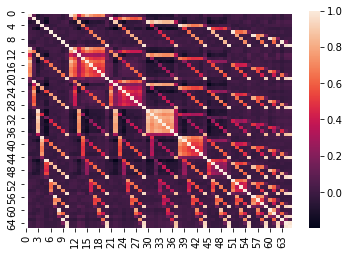

In [74]:
Pf = PolynomialFeatures(2)
Pl = Pf.fit_transform(df)
Pl_new = pd.DataFrame(Pl)
sns.heatmap(Pl_new.corr());

In [75]:
plc = Pl_new.corr()
plc

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,...,0.022279,0.032947,0.002385,0.017991,0.020446,-0.011824,0.017218,-0.035027,0.013474,0.014530
2,NaN,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,...,0.020243,0.000167,-0.010241,-0.000304,-0.013073,-0.031314,0.001252,-0.034020,-0.004560,-0.001505
3,NaN,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,...,-0.003658,-0.018266,0.012981,0.037677,-0.022595,0.002720,0.041135,0.018674,0.042783,0.040674
4,NaN,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,...,-0.018718,0.000759,-0.011873,0.012763,0.014739,0.019592,0.028011,0.011924,0.019930,0.020784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,-0.011824,-0.031314,0.002720,0.019592,-0.029247,0.010951,-0.015811,0.763671,0.611952,...,-0.013319,0.534493,0.378594,0.017266,0.753728,1.000000,0.170752,0.607000,0.117204,0.022854
62,NaN,0.017218,0.001252,0.041135,0.028011,-0.034011,-0.007907,-0.017182,0.203094,0.020007,...,-0.020969,0.131836,-0.001361,0.913353,0.204581,0.170752,1.000000,0.018571,0.923885,0.953339
63,NaN,-0.035027,-0.034020,0.018674,0.011924,-0.013561,0.012726,-0.019417,-0.019241,0.990672,...,-0.018180,-0.028597,0.618950,0.015104,-0.014850,0.607000,0.018571,1.000000,0.174752,0.021738
64,NaN,0.013474,-0.004560,0.042783,0.019930,-0.018458,-0.013917,-0.019069,0.007632,0.176145,...,-0.021508,-0.008411,0.096276,0.928363,0.009721,0.117204,0.923885,0.174752,1.000000,0.969761


In [76]:
r = []
for i in range(plc.shape[0]):
    for j in range(plc.shape[1]):
        if plc.loc[i,j] >= 0.8:
            r.append([i,j])

In [77]:
ft_nm = Pf.get_feature_names_out()
ft_nm

array(['1', 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity',
       'Potability', 'ph^2', 'ph Hardness', 'ph Solids', 'ph Chloramines',
       'ph Sulfate', 'ph Conductivity', 'ph Organic_carbon',
       'ph Trihalomethanes', 'ph Turbidity', 'ph Potability',
       'Hardness^2', 'Hardness Solids', 'Hardness Chloramines',
       'Hardness Sulfate', 'Hardness Conductivity',
       'Hardness Organic_carbon', 'Hardness Trihalomethanes',
       'Hardness Turbidity', 'Hardness Potability', 'Solids^2',
       'Solids Chloramines', 'Solids Sulfate', 'Solids Conductivity',
       'Solids Organic_carbon', 'Solids Trihalomethanes',
       'Solids Turbidity', 'Solids Potability', 'Chloramines^2',
       'Chloramines Sulfate', 'Chloramines Conductivity',
       'Chloramines Organic_carbon', 'Chloramines Trihalomethanes',
       'Chloramines Turbidity', 'Chloramines Potability', 'Sulfate^2',
       'Sulfate Conductivity', 

In [78]:
for ft1, ft2 in r:
    print(f"{ft_nm[ft1]} correlates with {ft_nm[ft2]}")

ph correlates with ph
ph correlates with ph^2
ph correlates with ph Hardness
ph correlates with ph Sulfate
Hardness correlates with Hardness
Hardness correlates with Hardness^2
Solids correlates with Solids
Solids correlates with ph Solids
Solids correlates with Hardness Solids
Solids correlates with Solids^2
Solids correlates with Solids Chloramines
Solids correlates with Solids Sulfate
Solids correlates with Solids Conductivity
Solids correlates with Solids Organic_carbon
Solids correlates with Solids Trihalomethanes
Solids correlates with Solids Turbidity
Chloramines correlates with Chloramines
Chloramines correlates with Chloramines^2
Chloramines correlates with Chloramines Sulfate
Sulfate correlates with Sulfate
Sulfate correlates with Sulfate^2
Conductivity correlates with Conductivity
Conductivity correlates with Sulfate Conductivity
Conductivity correlates with Conductivity^2
Organic_carbon correlates with Organic_carbon
Organic_carbon correlates with Hardness Organic_carbon
Or

As can be seen above, it turns out that all the combinations that are highly correlated with each of the 9 features also contains such feature making it hard to predict such feature when it is missing

#### BUILDING MODEL FOR PREDICTING MISSING VALUES

In [1]:
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error as MSE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.pipeline import make_pipeline
import joblib

#### When pH is Missing

In [203]:
X_pH = df.loc[:,['Turbidity','Sulfate','Hardness','Solids']]
y_pH = df['ph']

In [204]:
X_train_pH,X_test_pH,y_train_pH,y_test_pH = train_test_split(X_pH,y_pH,test_size=0.3,random_state=123)

In [205]:
scaler_pH = StandardScaler().fit(X_train_pH)
X_train_scaled_pH = scaler_pH.transform(X_train_pH)

In [206]:
ph_lin_model = LinearRegression().fit(X_train_scaled_pH,y_train_pH)

In [207]:
y_pred_pH = ph_lin_model.predict(scaler_pH.transform(X_test_pH))
y_train_pred_pH = ph_lin_model.predict(X_train_scaled_pH)

In [208]:
MSE(y_test_pH,y_pred_pH)

2.5436723356095348

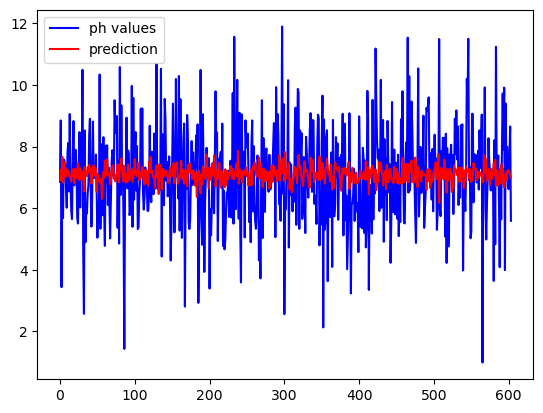

In [209]:
plt.plot(range(len(y_test_pH)),y_test_pH,'b',label='ph values')
plt.plot(range(len(y_pred_pH)),y_pred_pH,'r',label='prediction')
plt.legend(loc='best');

###### Feature Engineering

In [210]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [211]:
X_scaled_full_pH = StandardScaler().fit_transform(X_pH)

In [212]:
degree = np.arange(1,7)

In [213]:
train_score_pH, val_score_pH = validation_curve(PolynomialRegression(),
                                          X_scaled_full_pH,y_pH,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree,cv=5)

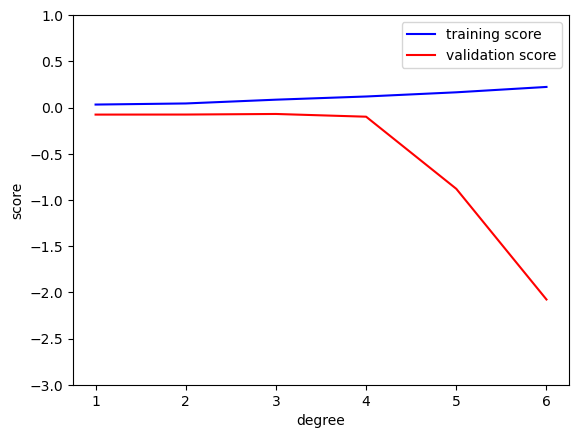

In [214]:
plt.plot(degree,np.median(train_score_pH,1),'b',label='training score')
plt.plot(degree,np.median(val_score_pH,1),'r',label='validation score')
plt.legend(loc='best')
plt.ylim(-3, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [215]:
np.median(train_score_pH,1)

array([0.03211287, 0.04398365, 0.08491523, 0.11933347, 0.16469545,
       0.22279888])

In [216]:
np.median(val_score_pH,1)

array([-0.07654733, -0.0759897 , -0.06981627, -0.09933405, -0.87993984,
       -2.07761056])

#### When Turbidity is Missing

In [217]:
X_turb = df.loc[:,['ph','Sulfate','Hardness','Solids']]
y_turb = df['Turbidity']

In [218]:
X_train_turb,X_test_turb,y_train_turb,y_test_turb = train_test_split(X_turb,y_turb,test_size=0.3,random_state=123)

In [219]:
scaler_turb = StandardScaler().fit(X_train_turb)
X_train_scaled_turb = scaler_turb.transform(X_train_turb)

In [220]:
tbd_lin_model = LinearRegression().fit(X_train_scaled_turb,y_train_turb)

In [221]:
y_pred_turb = tbd_lin_model.predict(scaler_turb.transform(X_test_turb))
y_train_pred_turb = tbd_lin_model.predict(X_train_scaled_turb)

In [222]:
MSE(y_test_turb,y_pred_turb)

0.620186225326382

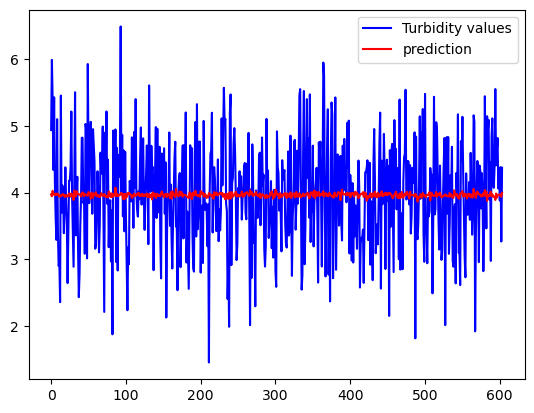

In [223]:
plt.plot(range(len(y_test_turb)),y_test_turb,'b',label='Turbidity values')
plt.plot(range(len(y_pred_turb)),y_pred_turb,'r',label='prediction')
plt.legend(loc='best');

##### Feature Engineering

In [224]:
X_scaled_full_turb = StandardScaler().fit_transform(X_turb)

In [225]:
degree = np.arange(1,7)

In [226]:
train_score_turb, val_score_turb = validation_curve(PolynomialRegression(),
                                          X_scaled_full_turb,y_turb,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree,cv=5)

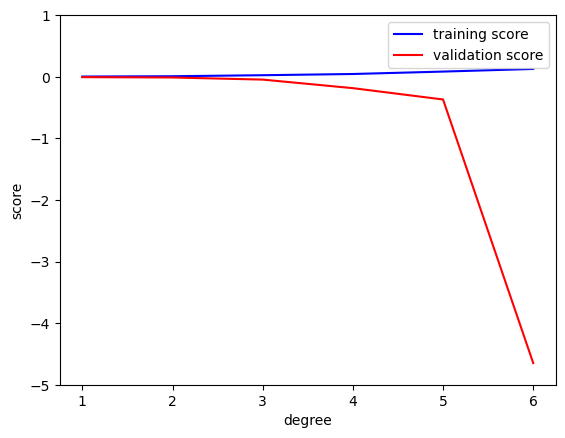

In [227]:
plt.plot(degree,np.median(train_score_turb,1),'b',label='training score')
plt.plot(degree,np.median(val_score_turb,1),'r',label='validation score')
plt.legend(loc='best')
plt.ylim(-5, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [228]:
np.median(train_score_turb,1)

array([0.00280033, 0.00794302, 0.02443081, 0.0441512 , 0.08343917,
       0.12604586])

In [229]:
np.median(val_score_turb,1)

array([-0.00688022, -0.01250628, -0.04664842, -0.18554659, -0.36951801,
       -4.64855074])

#### When Sulfate is missing

In [230]:
X_sft = df.loc[:,['Turbidity','ph','Hardness','Solids']]
y_sft = df['Sulfate']

In [231]:
X_train_sft,X_test_sft,y_train_sft,y_test_sft = train_test_split(X_sft,y_sft,test_size=0.3,random_state=123)

In [232]:
scaler_sft = StandardScaler().fit(X_train_sft)
X_train_scaled_sft = scaler_sft.transform(X_train_sft)

In [233]:
sft_lin_model = LinearRegression().fit(X_train_scaled_sft,y_train_sft)

In [234]:
y_pred_sft = sft_lin_model.predict(scaler_sft.transform(X_test_sft))
y_train_pred_sft = sft_lin_model.predict(X_train_scaled_sft)

In [235]:
MSE(y_test_sft,y_pred_sft)

1576.2363726050014

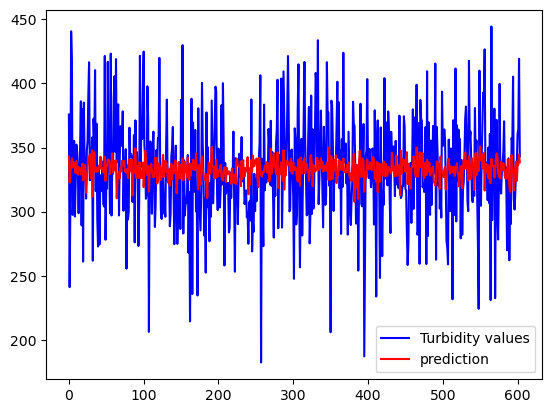

In [236]:
plt.plot(range(len(y_test_sft)),y_test_sft,'b',label='Turbidity values')
plt.plot(range(len(y_pred_sft)),y_pred_sft,'r',label='prediction')
plt.legend(loc='best');

##### Feature Engineering

In [237]:
X_scaled_full_sft = StandardScaler().fit_transform(X_sft)

In [238]:
degree = np.arange(1,7)

In [239]:
train_score_sft, val_score_sft = validation_curve(PolynomialRegression(),
                                          X_scaled_full_sft,y_sft,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree,cv=5)

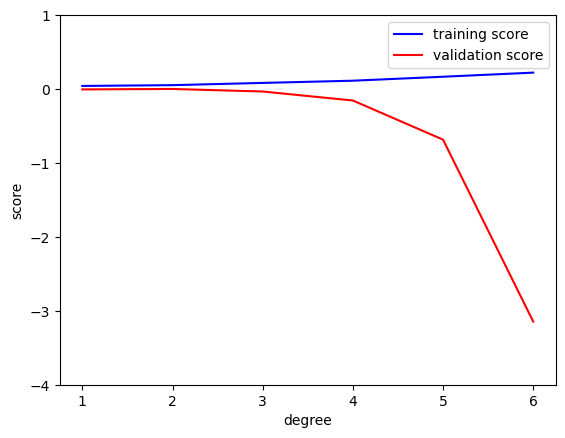

In [240]:
plt.plot(degree,np.median(train_score_sft,1),'b',label='training score')
plt.plot(degree,np.median(val_score_sft,1),'r',label='validation score')
plt.legend(loc='best')
plt.ylim(-4, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [241]:
np.median(train_score_sft,1)

array([0.04176771, 0.05270887, 0.08292115, 0.11271465, 0.16650516,
       0.22209064])

In [242]:
np.median(val_score_sft,1)

array([-5.01781530e-03,  1.02917123e-03, -3.34448301e-02, -1.55013535e-01,
       -6.84698472e-01, -3.14585186e+00])

#### Another Way to Find Turbidity

In [243]:
X_turb2 = df.loc[:,['ph','Sulfate','Hardness','Solids']]
y_turb2 = df['Turbidity']

In [244]:
X_train_turb2,X_test_turb2,y_train_turb2,y_test_turb2 = train_test_split(X_turb2,y_turb2,test_size=0.3,random_state=123)

In [245]:
scaler_turb2 = StandardScaler().fit(X_train_turb2)
X_train_scaled_turb2 = scaler_turb2.transform(X_train_turb2)

In [246]:
X_train_scaled_turb2.shape

(1407, 4)

In [247]:
tbd_lin_model_2 = LinearRegression().fit(X_train_scaled_turb2,y_train_turb2)

In [248]:
tbd_lin_model_2.predict(scaler_turb2.transform([[3,4,1,3]]))

C:\Users\USER\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.13455535])

In [249]:
y_pred_turb2 = tbd_lin_model_2.predict(scaler_turb2.transform(X_test_turb2))
y_train_pred_turb2 = tbd_lin_model_2.predict(X_train_scaled_turb2)

In [250]:
MSE(y_test_turb2,y_pred_turb2)

0.620186225326382

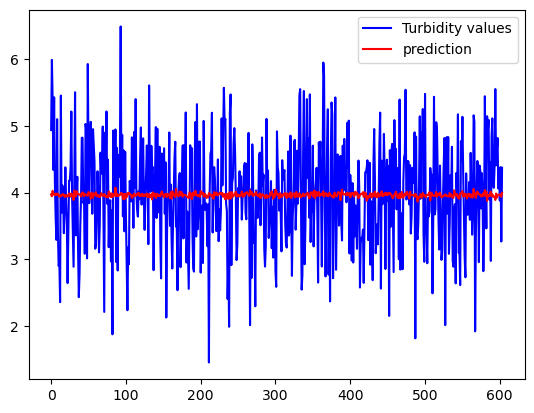

In [251]:
plt.plot(range(len(y_test_turb2)),y_test_turb2,'b',label='Turbidity values')
plt.plot(range(len(y_pred_turb2)),y_pred_turb2,'r',label='prediction')
plt.legend(loc='best');

##### Feature Engineering

In [252]:
X_scaled_full_turb2 = StandardScaler().fit_transform(X_turb2)

In [253]:
degree = np.arange(1,7)

In [254]:
train_score_turb2, val_score_turb2 = validation_curve(PolynomialRegression(),
                                          X_scaled_full_turb2,y_turb2,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree,cv=5)

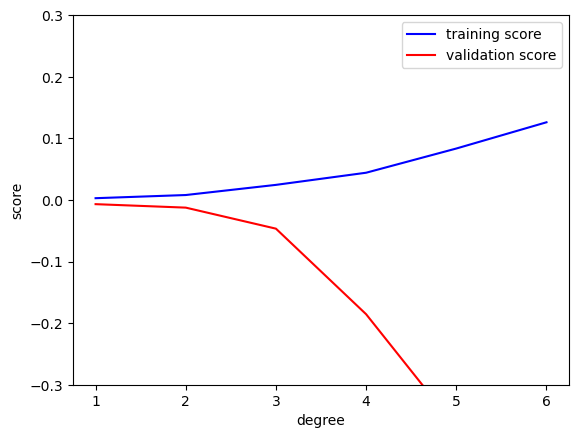

In [255]:
plt.plot(degree,np.median(train_score_turb2,1),'b',label='training score')
plt.plot(degree,np.median(val_score_turb2,1),'r',label='validation score')
plt.legend(loc='best')
plt.ylim(-0.3, 0.3)
plt.xlabel('degree')
plt.ylabel('score');

In [256]:
np.median(train_score_turb2,1)

array([0.00280033, 0.00794302, 0.02443081, 0.0441512 , 0.08343917,
       0.12604586])

In [257]:
np.median(val_score_turb2,1)

array([-0.00688022, -0.01250628, -0.04664842, -0.18554659, -0.36951801,
       -4.64855074])

##### Using Polynomial Feature of different orders

In [169]:
turb2_transform = PolynomialFeatures(2)
X_train_poly_turb2 = turb2_transform.fit_transform(X_train_turb2)

NameError: name 'X_train_turb2' is not defined

In [259]:
scaler_poly_turb2 = StandardScaler().fit(X_train_poly_turb2)
X_train_final_turb2 = scaler_poly_turb2.transform(X_train_poly_turb2)

In [260]:
turb2_model = LinearRegression().fit(X_train_final_turb2,y_train_turb2)

In [261]:
X_test_poly_turb2 = turb2_transform.fit_transform(X_test_turb2)
y_final_pred_turb2 = turb2_model.predict(scaler_poly_turb2.transform(X_test_poly_turb2))

In [262]:
y_train_final_pred_turb2 = turb2_model.predict(X_train_final_turb2)

In [263]:
MSE(y_test_turb2,y_final_pred_turb2)

0.6249578302228531

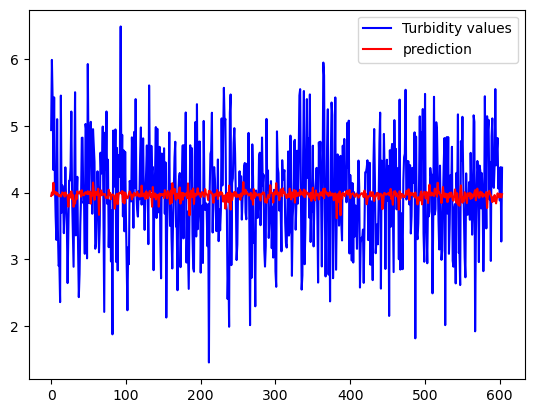

In [264]:
plt.plot(range(len(y_test_turb2)),y_test_turb2,'b',label='Turbidity values')
plt.plot(range(len(y_final_pred_turb2)),y_final_pred_turb2,'r',label='prediction')
plt.legend(loc='best');

#### Another Way to Find pH

In [271]:
X_pH2 = df.loc[:,['Sulfate','Hardness','Solids']]
y_pH2 = df['ph']

In [272]:
X_train_pH2,X_test_pH2,y_train_pH2,y_test_pH2 = train_test_split(X_pH2,y_pH2,test_size=0.3,random_state=123)

In [273]:
scaler_pH2 = StandardScaler().fit(X_train_pH2)
X_train_scaled_pH2 = scaler_pH2.transform(X_train_pH2)

In [274]:
pH_lin_model_2 = LinearRegression().fit(X_train_scaled_pH2,y_train_pH2)

In [276]:
y_pred_pH2 = pH_lin_model_2.predict(scaler_pH2.transform(X_test_pH2))
y_train_pred_pH2 = pH_lin_model_2.predict(X_train_scaled_pH2)

In [277]:
MSE(y_test_pH2,y_pred_pH2)

2.545106252389542

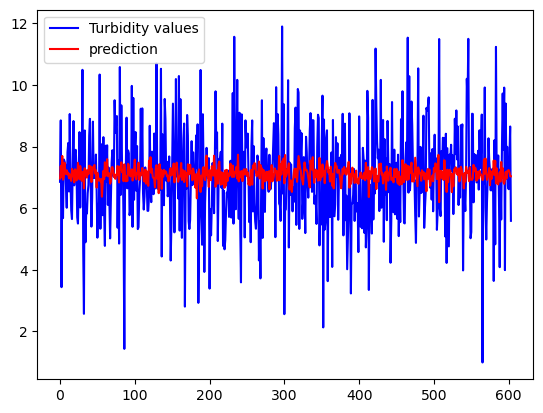

In [278]:
plt.plot(range(len(y_test_pH2)),y_test_pH2,'b',label='Turbidity values')
plt.plot(range(len(y_pred_pH2)),y_pred_pH2,'r',label='prediction')
plt.legend(loc='best');

##### Feature Engineering

In [279]:
X_scaled_full_pH2 = StandardScaler().fit_transform(X_pH2)

In [280]:
degree = np.arange(1,7)

In [281]:
train_score_pH2, val_score_pH2 = validation_curve(PolynomialRegression(),
                                          X_scaled_full_pH2,y_pH2,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree,cv=5)

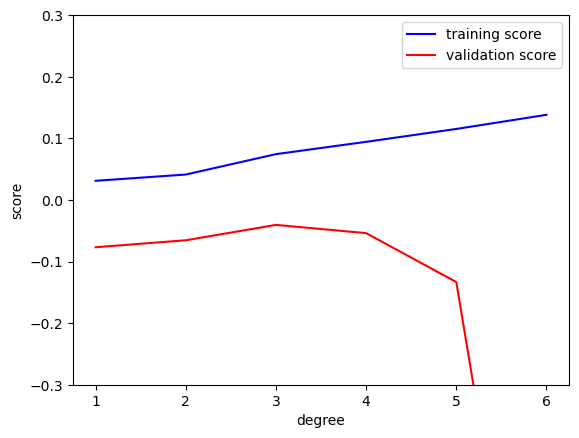

In [282]:
plt.plot(degree,np.median(train_score_pH2,1),'b',label='training score')
plt.plot(degree,np.median(val_score_pH2,1),'r',label='validation score')
plt.legend(loc='best')
plt.ylim(-0.3, 0.3)
plt.xlabel('degree')
plt.ylabel('score');

In [283]:
np.median(train_score_pH2,1)

array([0.03103216, 0.04120518, 0.07432559, 0.0942902 , 0.11520588,
       0.13815663])

In [284]:
np.median(val_score_pH2,1)

array([-0.07682695, -0.06551119, -0.04054434, -0.05391936, -0.13332878,
       -1.01269159])

##### Using Polynomial Feature of order 3

In [285]:
pH2_transform = PolynomialFeatures(3)
X_train_poly_pH2 = pH2_transform.fit_transform(X_train_pH2)

In [286]:
scaler_poly_pH2 = StandardScaler().fit(X_train_poly_pH2)
X_train_final_pH2 = scaler_poly_pH2.transform(X_train_poly_pH2)

In [287]:
pH2_model = LinearRegression().fit(X_train_final_pH2,y_train_pH2)

In [288]:
X_test_poly_pH2 = pH2_transform.fit_transform(X_test_pH2)
y_final_pred_pH2 = pH2_model.predict(scaler_poly_pH2.transform(X_test_poly_pH2))

In [289]:
y_train_final_pred_pH2 = pH2_model.predict(X_train_final_pH2)

In [290]:
MSE(y_test_pH2,y_final_pred_pH2)

2.568389461209955

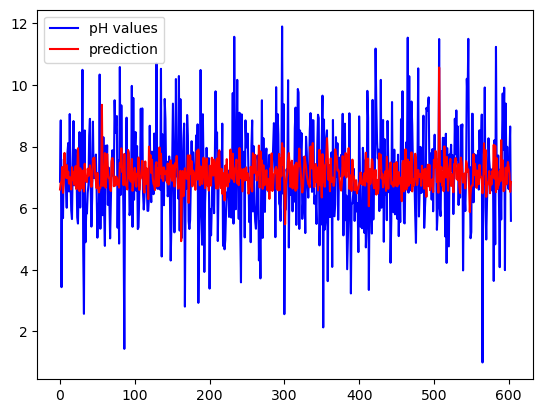

In [291]:
plt.plot(range(len(y_test_pH2)),y_test_pH2,'b',label='pH values')
plt.plot(range(len(y_final_pred_pH2)),y_final_pred_pH2,'r',label='prediction')
plt.legend(loc='best');

#### BUILDING WATER POTABILITY MINI MODEL

In [292]:
X = df.loc[:,['ph','Turbidity','Sulfate','Hardness','Solids']]
y = df['Potability']

In [293]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [294]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [295]:
lin_model = LogisticRegression().fit(X_train_scaled,y_train)

In [296]:
y_pred = lin_model.predict(scaler.transform(X_test))
y_train_pred = lin_model.predict(X_train_scaled)

In [297]:
accuracy_score(y_test,y_pred)

0.5993377483443708

In [298]:
accuracy_score(y_train,y_train_pred)

0.5984363894811656

##### Feature Engineering

In [299]:
def PolynomialRegression2(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LogisticRegression(**kwargs))

In [300]:
X_scaled_full = StandardScaler().fit_transform(X)

In [301]:
degree = np.arange(1,7)

In [302]:
train_score, val_score = validation_curve(PolynomialRegression2(max_iter=10000),
                                          X_scaled_full,y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree,cv=5)

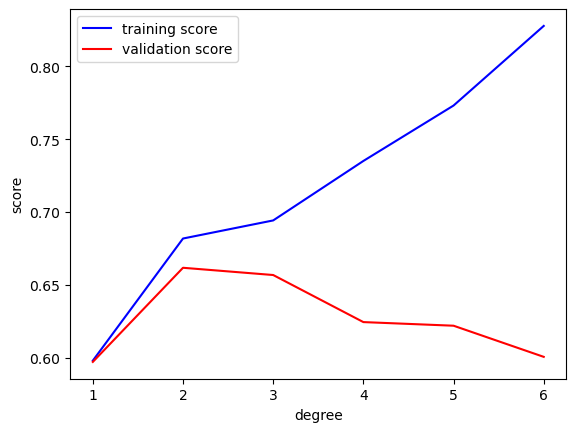

In [303]:
plt.plot(degree,np.median(train_score,1),'b',label='training score')
plt.plot(degree,np.median(val_score,1),'r',label='validation score')
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score');

In [304]:
np.median(train_score,1)

array([0.59788689, 0.68178993, 0.69422001, 0.73507463, 0.77315103,
       0.82784338])

In [305]:
np.median(val_score,1)

array([0.59701493, 0.66169154, 0.65671642, 0.62437811, 0.62189055,
       0.60049628])

##### Using Polynomial Feature of order 2

In [306]:
transform = PolynomialFeatures(2)
X_train_poly = transform.fit_transform(X_train)

In [307]:
scaler_poly = StandardScaler().fit(X_train_poly)
X_train_final = scaler_poly.transform(X_train_poly)

In [308]:
model = LogisticRegression().fit(X_train_final,y_train)

In [309]:
X_test_poly = transform.fit_transform(X_test)
y_final_pred = model.predict(scaler_poly.transform(X_test_poly))

In [310]:
y_train_final_pred = model.predict(X_train_final)

In [311]:
accuracy_score(y_test,y_final_pred)

0.6754966887417219

In [312]:
accuracy_score(y_train,y_train_final_pred)

0.6787491115849325

#### DUMPING NEEDED MODELS AND PREPROCCESSORS

##### Dumping for pH

In [3]:
'''joblib.dump(scaler_pH2,'pH_scaler.sav')
joblib.dump(pH_lin_model_2,'pH_model.sav')'''

"joblib.dump(scaler_pH2,'pH_scaler.sav')\njoblib.dump(pH_lin_model_2,'pH_model.sav')"

##### Dumping for Turbidity

In [2]:
'''joblib.dump(scaler_turb2,'turb_scaler.sav')
joblib.dump(tbd_lin_model_2,'turb_model.sav')'''

"joblib.dump(scaler_turb2,'turb_scaler.sav')\njoblib.dump(tbd_lin_model_2,'turb_model.sav')"

##### Dumping for Main Predictor

In [4]:
'''joblib.dump(transform,'transformer.sav')
joblib.dump(scaler_poly,'scaler.sav')
joblib.dump(model,'model.sav')'''

"joblib.dump(transform,'transformer.sav')\njoblib.dump(scaler_poly,'scaler.sav')\njoblib.dump(model,'model.sav')"

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.decomposition import PCA

In [5]:
df = pd.read_excel('Datasets/aquaattributes.xlsx')

In [6]:
df.head(20)

,Stationcode,Locations,Lat,Lon,Capitalcity,State,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,1001,BEAS AT U/S MANALI,32.244947,77.191080,Shimla,HIMACHAL PRADESH,9.0,9.0,8.0,85,0.10,0.2,106,397.0,yes
1,1002,BEAS AT D/S KULU,31.960582,77.114009,Shimla,HIMACHAL PRADESH,10.0,9.0,8.0,102,0.30,0.4,153,954.0,yes
2,1003,BEAS AT D/S AUT,26.887893,75.811484,Shimla,HIMACHAL PRADESH,11.0,9.0,8.0,96,0.20,0.3,58,653.0,yes
3,1004,BEAS AT U/S PANDON DAM,47.351943,19.633621,Shimla,HIMACHAL PRADESH,13.0,9.0,8.0,94,0.20,0.4,34,317.0,yes
4,1005,BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE,25.992786,91.826111,Shimla,HIMACHAL PRADESH,14.0,10.0,8.0,112,0.20,0.5,213,1072.0,yes
5,1550,U/S MANDI,31.708165,76.931367,Shimla,HIMACHAL PRADESH,16.0,9.0,8.0,117,0.20,0.5,100,722.0,yes
6,1006,BEAS AT D/S MANDI,31.708165,76.931367,Shimla,HIMACHAL PRADESH,16.0,9.0,8.0,155,0.50,0.7,445,1855.0,yes
7,2604,BEAS AT D/S JAISINGHPUR,31.899643,76.597945,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,211,0.50,0.5,7,72.0,yes
8,1007,BEAS AT D/S ALAMPUR,15.884349,78.119382,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,202,0.60,0.4,9,123.0,yes
9,1008,BEAS AT D/S DEHRAGOPIPUR,31.881756,76.214645,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,280,0.70,1.1,10,157.0,yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    1361 non-null   int64  
 1   Locations      1361 non-null   object 
 2   Lat            1294 non-null   float64
 3   Lon            1294 non-null   float64
 4   Capitalcity    1361 non-null   object 
 5   State          1360 non-null   object 
 6   Temperature    1327 non-null   float64
 7   D.O            1352 non-null   float64
 8   pH             1360 non-null   float64
 9   Conductivity   1324 non-null   object 
 10  B.O.D          1293 non-null   float64
 11  Nitrate        1152 non-null   object 
 12  Fecalcaliform  1173 non-null   object 
 13  Totalcaliform  1226 non-null   float64
 14  class          1361 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 159.6+ KB


In [8]:
df.isnull().sum()

Stationcode        0
Locations          0
Lat               67
Lon               67
Capitalcity        0
State              1
Temperature       34
D.O                9
pH                 1
Conductivity      37
B.O.D             68
Nitrate          209
Fecalcaliform    188
Totalcaliform    135
class              0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Stationcode      0
Locations        0
Lat              0
Lon              0
Capitalcity      0
State            0
Temperature      0
D.O              0
pH               0
Conductivity     0
B.O.D            0
Nitrate          0
Fecalcaliform    0
Totalcaliform    0
class            0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    object 
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    object 
 12  Fecalcaliform  967 non-null    object 
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(7), int64(1), object(7)
memory usage: 120.9+ KB


In [12]:
cndt = df['Conductivity']

In [13]:
[x for x in cndt.apply(type).unique()]

[int, float]

In [14]:
df['Conductivity'] = df['Conductivity'].astype(float)

In [15]:
nitr = df['Nitrate']

In [16]:
[x for x in nitr.apply(type).unique()]

[float, int]

In [17]:
df['Nitrate'] = df['Nitrate'].astype(float)

In [18]:
fclf = df['Fecalcaliform']

In [19]:
[x for x in fclf.apply(type).unique()]

[int, float]

In [20]:
df['Fecalcaliform'] = df['Fecalcaliform'].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    float64
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    float64
 12  Fecalcaliform  967 non-null    float64
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(10), int64(1), object(4)
memory usage: 120.9+ KB


In [22]:
df.describe()

,Stationcode,Lat,Lon,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform
count,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,9.670000e+02,9.670000e+02
mean,1899.374354,20.970569,78.364700,25.355714,6.891423,7.668664,1323.534458,3.738066,5.075913,1.773840e+05,5.361407e+05
std,706.222881,6.459671,6.894196,4.413136,1.674220,0.478087,3703.988886,8.546417,30.069937,3.792506e+06,1.015845e+07
min,4.000000,8.388518,19.633621,5.000000,0.000000,5.200000,25.250000,0.000000,0.000000,1.400000e+00,5.000000e-03
25%,1326.500000,17.000538,74.970558,24.000000,6.200000,7.450000,201.500000,1.021250,0.304167,1.579167e+01,5.000000e+01
50%,1960.000000,21.007658,76.852727,26.458333,7.091667,7.788333,388.000000,2.091667,0.800000,1.441667e+02,4.650000e+02
75%,2515.500000,26.234941,80.964831,27.908333,7.750000,8.000000,754.333333,3.936667,2.000000,8.245833e+02,1.746665e+03
max,3029.000000,47.351943,95.999123,37.500000,30.366667,9.575000,36593.000000,158.750000,640.000000,1.100000e+08,2.500000e+08


In [23]:
df_new = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Fecalcaliform','Totalcaliform','class']]

In [24]:
df_new['class'] = df_new['class'] == 'yes'

In [25]:
df_new.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,9.0,9.0,8.0,85.0,0.1,0.2,106.0,397.0,True
1,10.0,9.0,8.0,102.0,0.3,0.4,153.0,954.0,True
2,11.0,9.0,8.0,96.0,0.2,0.3,58.0,653.0,True
3,13.0,9.0,8.0,94.0,0.2,0.4,34.0,317.0,True
4,14.0,10.0,8.0,112.0,0.2,0.5,213.0,1072.0,True


In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   D.O            967 non-null    float64
 2   pH             967 non-null    float64
 3   Conductivity   967 non-null    float64
 4   B.O.D          967 non-null    float64
 5   Nitrate        967 non-null    float64
 6   Fecalcaliform  967 non-null    float64
 7   Totalcaliform  967 non-null    float64
 8   class          967 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 68.9 KB


In [27]:
df_new.corr()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
Temperature,1.000000,-0.137697,-0.062000,0.132268,0.059620,0.026301,-0.013133,-0.013379,-0.162458
D.O,-0.137697,1.000000,0.194636,-0.092865,-0.280783,0.011558,-0.165299,-0.182276,-0.147469
pH,-0.062000,0.194636,1.000000,-0.008232,-0.004717,-0.147210,0.008265,0.009426,-0.298328
Conductivity,0.132268,-0.092865,-0.008232,1.000000,0.164644,-0.008017,-0.003694,-0.003406,0.069188
B.O.D,0.059620,-0.280783,-0.004717,0.164644,1.000000,0.004074,0.053959,0.063619,0.047831
Nitrate,0.026301,0.011558,-0.147210,-0.008017,0.004074,1.000000,-0.005780,-0.006528,0.005181
Fecalcaliform,-0.013133,-0.165299,0.008265,-0.003694,0.053959,-0.005780,1.000000,0.848463,0.024510
Totalcaliform,-0.013379,-0.182276,0.009426,-0.003406,0.063619,-0.006528,0.848463,1.000000,0.027741
class,-0.162458,-0.147469,-0.298328,0.069188,0.047831,0.005181,0.024510,0.027741,1.000000


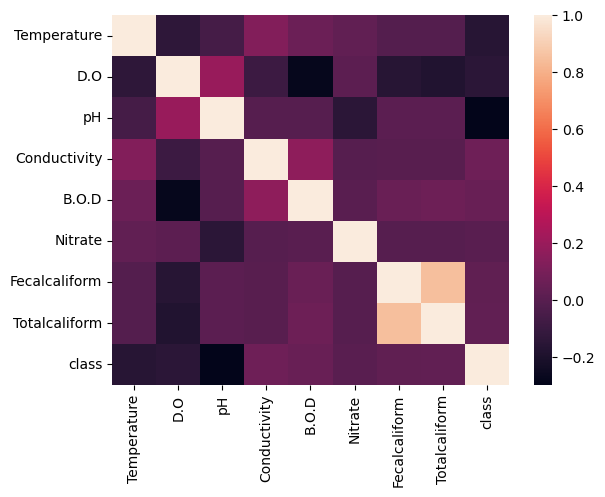

In [28]:
sns.heatmap(df_new.corr());

In [29]:
X = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Totalcaliform']]

In [30]:
X.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Totalcaliform
0,9.0,9.0,8.0,85.0,0.1,0.2,397.0
1,10.0,9.0,8.0,102.0,0.3,0.4,954.0
2,11.0,9.0,8.0,96.0,0.2,0.3,653.0
3,13.0,9.0,8.0,94.0,0.2,0.4,317.0
4,14.0,10.0,8.0,112.0,0.2,0.5,1072.0


In [31]:
[x for x in df['class'].apply(type).unique()]

[str]

In [32]:
df['class'].unique()

array(['yes', 'no'], dtype=object)

In [33]:
y = df['class'] == 'yes'

In [34]:
y.head()

0    True
1    True
2    True
3    True
4    True
Name: class, dtype: bool

In [35]:
y.value_counts()

class
True     751
False    216
Name: count, dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
X_scaled = StandardScaler().fit_transform(X)

In [38]:
pca = PCA(3)
projected = pca.fit_transform(X_scaled)

C:\Users\USER\AppData\Local\Temp\ipykernel_5620\970416700.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=y,cmap=plt.cm.get_cmap('Spectral',2))


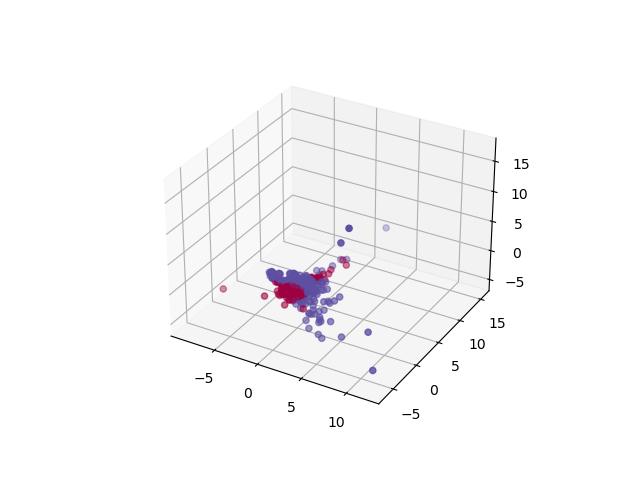

In [39]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(projected[:,0],projected[:,1],projected[:,2],
            c=y,cmap=plt.cm.get_cmap('Spectral',2))

plt.show()

In [40]:
X.shape

(967, 7)

In [41]:
y.shape

(967,)

In [42]:
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error as MSE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.pipeline import make_pipeline
import joblib

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [44]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [45]:
lin_model = LogisticRegression().fit(X_train_scaled,y_train)

In [46]:
y_pred = lin_model.predict(scaler.transform(X_test))
y_train_pred = lin_model.predict(X_train_scaled)

In [47]:
accuracy_score(y_test,y_pred)

0.8109965635738832

In [48]:
f1_score(y_test,y_pred)

0.8902195608782435

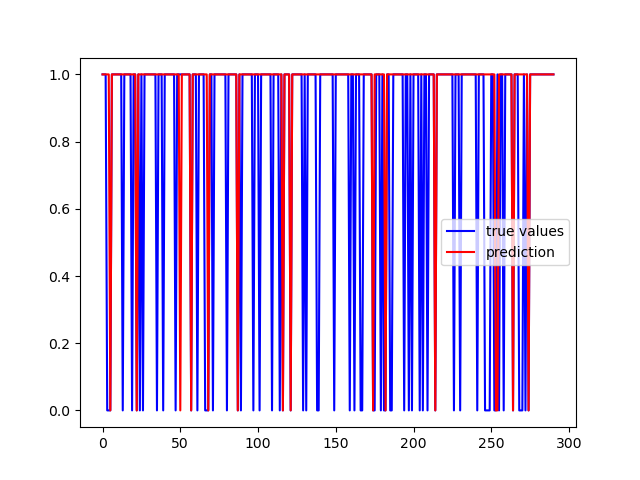

In [49]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(range(len(y_test)),y_test,'b',label='true values')
ax.plot(range(len(y_pred)),y_pred,'r',label='prediction')
ax.legend();

#plt.plot(range(len(y_test)),y_test,'b',label='true values')
#plt.plot(range(len(y_pred)),y_pred,'r',label='prediction')
#plt.legend(loc='best');

In [50]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [51]:
lin_model = LogisticRegression().fit(X_train_scaled,y_train)

In [52]:
y_pred = lin_model.predict(scaler.transform(X_test))
y_train_pred = lin_model.predict(X_train_scaled)

In [53]:
accuracy_score(y_test,y_pred)

0.8109965635738832

In [54]:
lin_model.coef_

array([[-0.53135364, -0.40181205, -0.72326626,  0.29077435,  0.1520239 ,
        -0.03311152,  0.37885916]])

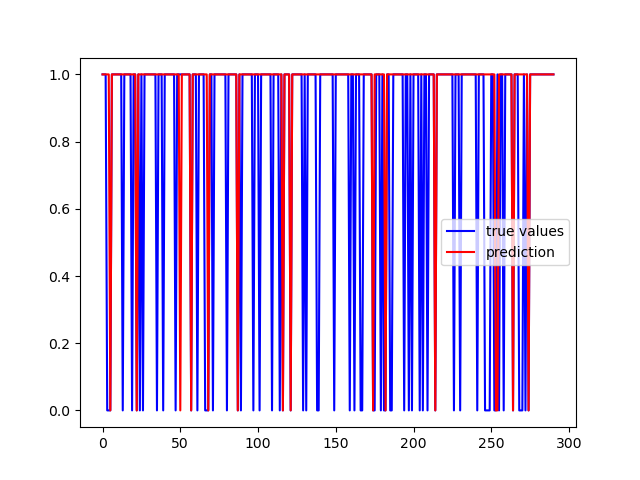

In [55]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(range(len(y_test)),y_test,'b',label='true values')
ax.plot(range(len(y_pred)),y_pred,'r',label='prediction')
ax.legend();

#plt.plot(range(len(y_test)),y_test,'b',label='true values')
#plt.plot(range(len(y_pred)),y_pred,'r',label='prediction')
#plt.legend(loc='best');

###### Feature Engineering

In [56]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LogisticRegression(**kwargs))

In [57]:
X_scaled_full = StandardScaler().fit_transform(X)

In [58]:
degree = np.arange(1,7)

In [59]:
train_score, val_score = validation_curve(PolynomialRegression(max_iter=100000),
                                          X_scaled_full,y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree,cv=5)

C:\Users\USER\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

"\nplt.plot(degree,np.median(train_score,1),'b',label='training score')\nplt.plot(degree,np.median(val_score,1),'r',label='validation score')\nplt.legend(loc='best')\nplt.xlabel('degree')\nplt.ylabel('score');\n"

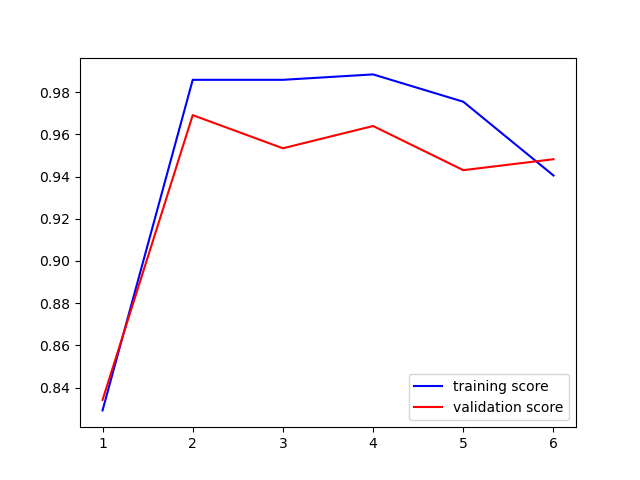

In [60]:
fig = plt.figure();
ax = fig.add_subplot();

ax.plot(degree,np.median(train_score,1),'b',label='training score');
ax.plot(degree,np.median(val_score,1),'r',label='validation score');
ax.legend();

'''
plt.plot(degree,np.median(train_score,1),'b',label='training score')
plt.plot(degree,np.median(val_score,1),'r',label='validation score')
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score');
'''

In [61]:
np.median(train_score,1)

array([0.82923674, 0.98578811, 0.98578811, 0.98835705, 0.97542044,
       0.94049159])

In [62]:
np.median(val_score,1)

array([0.83419689, 0.96907216, 0.95336788, 0.96391753, 0.94300518,
       0.94818653])

##### Using Polynomial Feature of order 4

In [63]:
lin_model = LogisticRegression().fit(X_train_scaled,y_train)

In [64]:
y_pred = lin_model.predict(scaler.transform(X_test))
y_train_pred = lin_model.predict(X_train_scaled)

In [65]:
accuracy_score(y_test,y_pred)

0.8109965635738832

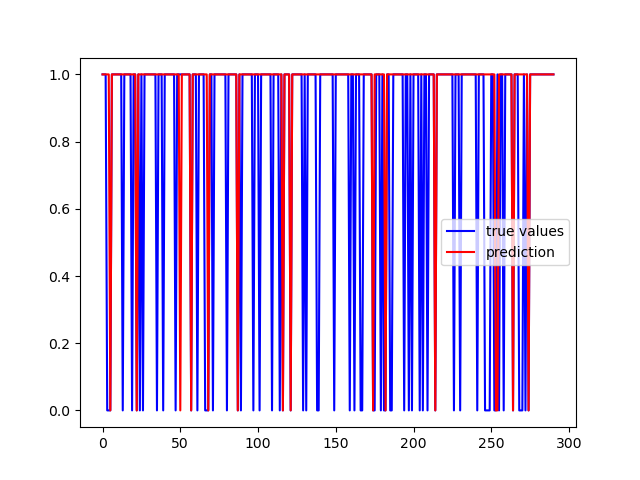

In [66]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(range(len(y_test)),y_test,'b',label='true values')
ax.plot(range(len(y_pred)),y_pred,'r',label='prediction')
ax.legend();

#plt.plot(range(len(y_test)),y_test,'b',label='true values')
#plt.plot(range(len(y_pred)),y_pred,'r',label='prediction')
#plt.legend(loc='best');

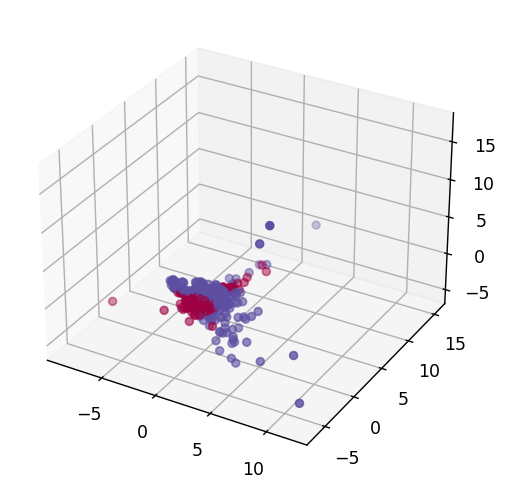

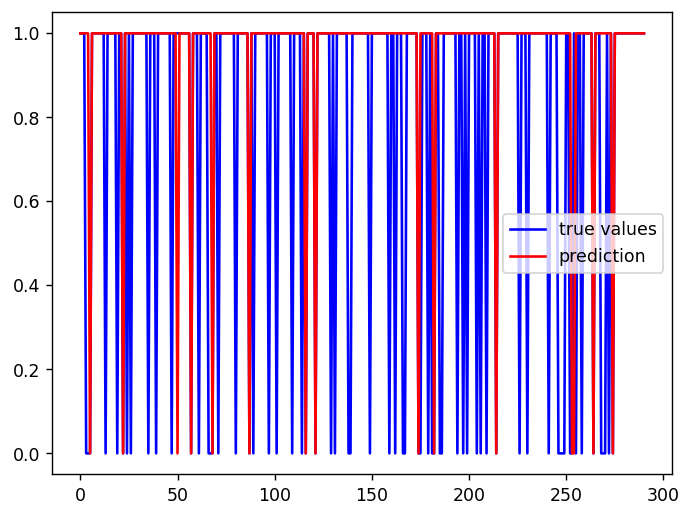

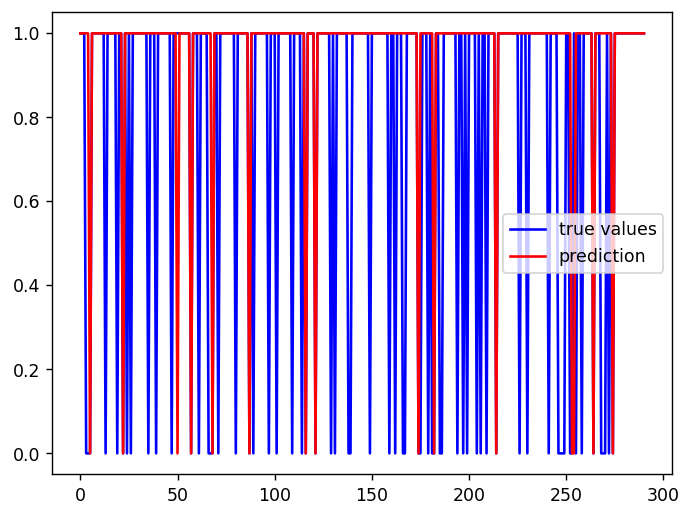

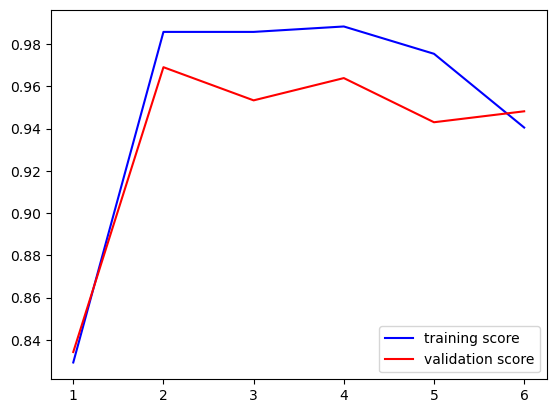

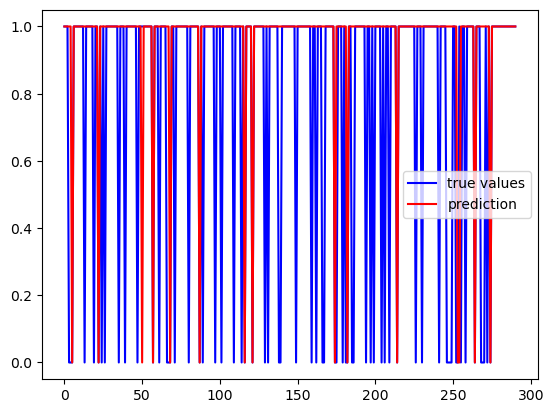

In [67]:
%matplotlib inline
plt.show()

In [73]:
degree_list = np.arange(1,19)

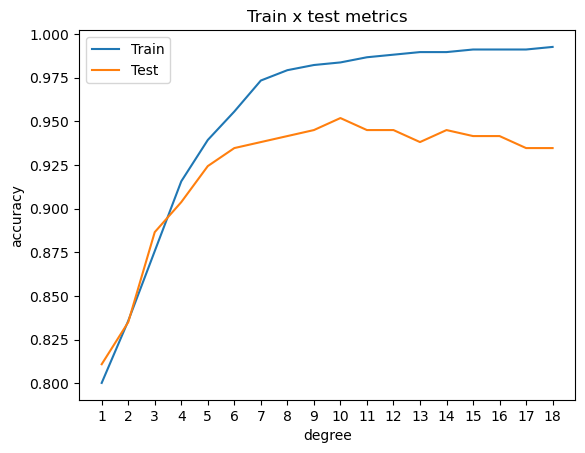

In [74]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_test = []
f1_list_test = []

for degree in degree_list:
    transform = PolynomialFeatures(degree)
    X_train_poly = transform.fit_transform(X_train)
    scaler_poly = StandardScaler().fit(X_train_poly)
    X_train_final = scaler_poly.transform(X_train_poly)
    model = LogisticRegression(max_iter=100000).fit(X_train_final,y_train)
    X_test_poly = transform.fit_transform(X_test)
    y_final_pred = model.predict(scaler_poly.transform(X_test_poly))
    y_train_final_pred = model.predict(X_train_final)
    accuracy_train = accuracy_score(y_train,y_train_final_pred)
    f1_train = f1_score(y_train,y_train_final_pred)
    accuracy_test = accuracy_score(y_test,y_final_pred)
    f1_test = f1_score(y_test,y_final_pred)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_test.append(accuracy_test)
    f1_list_test.append(f1_test)
                              
plt.title('Train x test metrics')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(degree_list)),labels=degree_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])
plt.show();

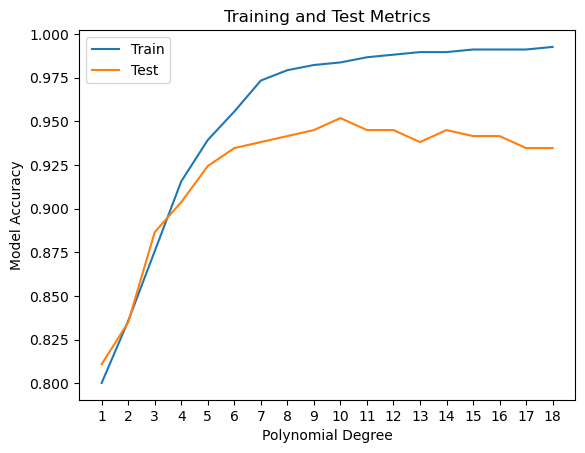

In [78]:
plt.title('Training and Test Metrics')
plt.xlabel('Polynomial Degree')
plt.ylabel('Model Accuracy')
plt.xticks(ticks = range(len(degree_list)),labels=degree_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])
plt.show();

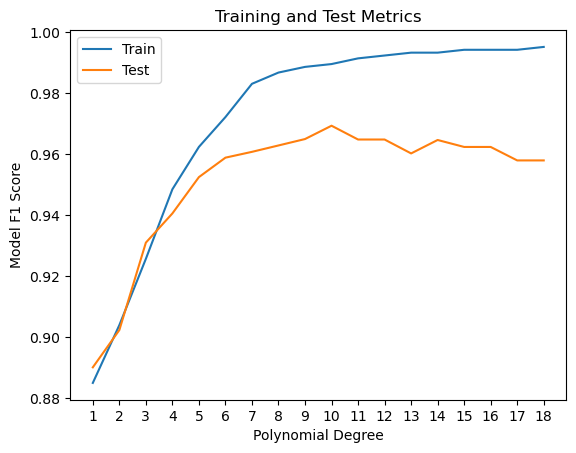

In [79]:
plt.title('Training and Test Metrics')
plt.xlabel('Polynomial Degree')
plt.ylabel('Model F1 Score')
plt.xticks(ticks = range(len(degree_list)),labels=degree_list)
plt.plot(f1_list_train)
plt.plot(f1_list_test)
plt.legend(['Train','Test'])
plt.show();

In [72]:
np.array(accuracy_list_train)*100

array([80.0295858 , 83.57988166, 87.5739645 , 91.56804734, 93.93491124,
       95.56213018, 97.33727811, 97.92899408, 98.22485207, 98.37278107,
       98.66863905, 98.81656805, 98.96449704, 98.96449704, 99.11242604,
       99.11242604, 99.11242604, 99.26035503])

In [86]:
a = 100*np.array(accuracy_list_train).reshape(-1,1)
for i in range(len(a)):
    print(f"{a[i][0]:.2f}")

80.03
83.58
87.57
91.57
93.93
95.56
97.34
97.93
98.22
98.37
98.67
98.82
98.96
98.96
99.11
99.11
99.11
99.26


In [85]:
a = 100*np.array(accuracy_list_test).reshape(-1,1)
for i in range(len(a)):
    print(f"{a[i][0]:.2f}")

81.10
83.51
88.66
90.38
92.44
93.47
93.81
94.16
94.50
95.19
94.50
94.50
93.81
94.50
94.16
94.16
93.47
93.47


In [87]:
a = 100*np.array(f1_list_train).reshape(-1,1)
for i in range(len(a)):
    print(f"{a[i][0]:.2f}")

88.51
90.41
92.58
94.86
96.25
97.23
98.32
98.69
98.87
98.97
99.15
99.25
99.34
99.34
99.43
99.43
99.43
99.53


In [88]:
a = 100*np.array(f1_list_test).reshape(-1,1)
for i in range(len(a)):
    print(f"{a[i][0]:.2f}")

89.02
90.24
93.11
94.07
95.26
95.90
96.09
96.30
96.51
96.94
96.49
96.49
96.04
96.48
96.25
96.25
95.81
95.81


In [ ]:
f1_list_train

In [ ]:
f1_list_test

In [100]:
transform = PolynomialFeatures(3)
X_train_poly = transform.fit_transform(X_train)

In [101]:
scaler_poly = StandardScaler().fit(X_train_poly)
X_train_final = scaler_poly.transform(X_train_poly)

In [102]:
model = LogisticRegression(max_iter=100000).fit(X_train_final,y_train)

In [103]:
X_test_poly = transform.fit_transform(X_test)
y_final_pred = model.predict(scaler_poly.transform(X_test_poly))

In [104]:
y_train_final_pred = model.predict(X_train_final)

In [105]:
accuracy_score(y_test,y_final_pred)

0.8865979381443299

In [106]:
accuracy_score(y_train,y_train_final_pred)

0.8757396449704142

#### Using Neural Network

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

##### Using 4th Order Polynomial Transformation

In [81]:
transform = PolynomialFeatures(2).fit(X_train)
X_train_poly = transform.transform(X_train)

In [82]:
X_train_poly[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [83]:
X_train_poly = X_train_poly[:,1:]

In [84]:
norm = tf.keras.layers.Normalization(axis=-1)
norm.adapt(X_train_poly)
Xn = norm(X_train_poly)

In [85]:
lamdas = [0.0, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
22/22 [==============================] - 2s 3ms/step - loss: 0.4670
Epoch 2/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2541
Epoch 3/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1421
Epoch 4/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1508
Epoch 5/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1450
Epoch 6/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1957
Epoch 7/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1115
Epoch 8/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0985
Epoch 9/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0691
Epoch 10/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2081
Epoch 11/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1017
Epoch 12/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0909
Epoch 13/1000
22/22 [====

22/22 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 102/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0822
Epoch 103/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0397
Epoch 104/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 105/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0605
Epoch 106/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0490
Epoch 107/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0349
Epoch 108/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0282
Epoch 109/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 110/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 111/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0491
Epoch 112/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 113/1000
22/2

KeyboardInterrupt: 

In [139]:
X_test_poly = transform.transform(X_test)
X_test_poly = X_test_poly[:,1:]

acc_pred = [None] * len(models)
acc_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_test_poly))
    yhat_pred = y_pred >= 0.5
    acc_pred[i] = accuracy_score(y_test,yhat_pred)
    f1_pred[i] = f1_score(y_test,yhat_pred)
    
    yhat_train = model.predict(norm(X_train_poly))
    yhat_train = yhat_train >= 0.5
    acc_train[i] = accuracy_score(y_train,yhat_train)
    f1_train[i] = f1_score(y_train,yhat_train)

22/22 [==============================] - 0s 3ms/step


In [140]:
acc_pred

[0.8109965635738832,
 0.8109965635738832,
 0.8109965635738832,
 0.8109965635738832,
 0.8109965635738832,
 0.8109965635738832,
 0.8109965635738832,
 0.8109965635738832]

In [141]:
f1_pred

[0.8902195608782435,
 0.8902195608782435,
 0.8902195608782435,
 0.8902195608782435,
 0.8902195608782435,
 0.8902195608782435,
 0.8902195608782435,
 0.8902195608782435]

In [142]:
acc_train

[0.9970414201183432,
 0.9985207100591716,
 0.9911242603550295,
 0.9822485207100592,
 0.9704142011834319,
 0.9704142011834319,
 0.7781065088757396,
 0.7781065088757396]

In [143]:
f1_train

[0.9980952380952381,
 0.9990503323836657,
 0.9942748091603053,
 0.9885931558935361,
 0.981203007518797,
 0.9810606060606061,
 0.8752079866888519,
 0.8752079866888519]

In [99]:
lamda =  0.001,
model = Sequential(
    [
        Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
        Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
        Dense(1, activation='linear')            
    ]
)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01),
)
model.fit(
    Xn,y_train,
    epochs=1000
)

Epoch 1/1000
22/22 [==============================] - 1s 3ms/step - loss: 10.6882
Epoch 2/1000
22/22 [==============================] - 0s 3ms/step - loss: 1.1488
Epoch 3/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5861
Epoch 4/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5391
Epoch 5/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5365
Epoch 6/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5363
Epoch 7/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5316
Epoch 8/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5312
Epoch 9/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5319
Epoch 10/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5314
Epoch 11/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5348
Epoch 12/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5326
Epoch 13/1000
22/22 [===

Epoch 101/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5306
Epoch 102/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5304
Epoch 103/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5365
Epoch 104/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5330
Epoch 105/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5339
Epoch 106/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5303
Epoch 107/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5318
Epoch 108/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5328
Epoch 109/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5318
Epoch 110/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5305
Epoch 111/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5301
Epoch 112/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5304
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 298/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5303
Epoch 299/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5302
Epoch 300/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5306
Epoch 301/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 302/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5304
Epoch 303/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5301
Epoch 304/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 305/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5300
Epoch 306/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5299
Epoch 307/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 308/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 309/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 494/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 495/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5299
Epoch 496/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 497/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5301
Epoch 498/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5294
Epoch 499/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 500/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5303
Epoch 501/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 502/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 503/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 504/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5303
Epoch 505/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 690/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5294
Epoch 691/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 692/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 693/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5294
Epoch 694/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 695/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5294
Epoch 696/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5301
Epoch 697/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 698/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 699/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 700/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 701/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.5293
Epoch 886/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 887/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 888/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 889/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 890/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 891/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 892/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 893/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 894/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 895/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 896/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 897/1000
22/2

In [122]:
X_test_poly = transform.transform(X_test)
X_test_poly = X_test_poly[:,1:]

yhat_pred = model.predict(norm(X_test_poly))
yhat_pred = y_pred >= 0.5
acc_pred = accuracy_score(y_test,yhat_pred)
f1_pred = f1_score(y_test,yhat_pred)

yhat_train = model.predict(norm(X_train_poly))
yhat_train = yhat_train >= 0.5
acc_train = accuracy_score(y_train,yhat_train)
f1_train = f1_score(y_train,yhat_train)

22/22 [==============================] - 0s 2ms/step


In [96]:
lamdas = [0.0, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models = [None] * len(lamdas)

for i in range(len(lamdas)):
    lamda_ = lamdas[i]
    models[i] = Sequential(
        [
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lamda_)),
            Dense(1, activation='linear')            
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )
    models[i].fit(
        Xn,y_train,
        epochs=1000
    )
    print(f"Finished lamda = {lamda_}")

Epoch 1/1000
22/22 [==============================] - 2s 3ms/step - loss: 0.5369
Epoch 2/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3139
Epoch 3/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2678
Epoch 4/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1863
Epoch 5/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.2351
Epoch 6/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1048
Epoch 7/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1424
Epoch 8/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0928
Epoch 9/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0896
Epoch 10/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0806
Epoch 11/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0671
Epoch 12/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1013
Epoch 13/1000
22/22 [====

22/22 [==============================] - 0s 4ms/step - loss: 0.0348
Epoch 102/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0312
Epoch 103/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0447
Epoch 104/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0537
Epoch 105/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0435
Epoch 106/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0361
Epoch 107/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0749
Epoch 108/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0546
Epoch 109/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0339
Epoch 110/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0371
Epoch 111/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0494
Epoch 112/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 113/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 298/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 299/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 300/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 301/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 302/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 303/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 304/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 305/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 306/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 307/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 308/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 309/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 494/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 495/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 496/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0179
Epoch 497/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0180
Epoch 498/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.1307
Epoch 499/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.2154
Epoch 500/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.7162
Epoch 501/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1760
Epoch 502/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.2536
Epoch 503/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1711
Epoch 504/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1109
Epoch 505/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.1351
Epoch 690/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1028
Epoch 691/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0868
Epoch 692/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0822
Epoch 693/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0773
Epoch 694/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0744
Epoch 695/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0677
Epoch 696/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0643
Epoch 697/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0603
Epoch 698/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 699/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0512
Epoch 700/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0449
Epoch 701/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 886/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 887/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 888/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 889/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 890/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 891/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 892/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 893/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 894/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 895/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 896/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 897/1000
22/2

22/22 [==============================] - 0s 4ms/step - loss: 0.0573
Epoch 83/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0853
Epoch 84/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 85/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 86/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0522
Epoch 87/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1060
Epoch 88/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1125
Epoch 89/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0626
Epoch 90/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1252
Epoch 91/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0858
Epoch 92/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0965
Epoch 93/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1638
Epoch 94/1000
22/22 [=========

22/22 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 182/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0579
Epoch 183/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0735
Epoch 184/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0660
Epoch 185/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 186/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0726
Epoch 187/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1184
Epoch 188/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1310
Epoch 189/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0732
Epoch 190/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 191/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1105
Epoch 192/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0782
Epoch 193/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 378/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0401
Epoch 379/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 380/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0313
Epoch 381/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0405
Epoch 382/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 383/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0975
Epoch 384/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0511
Epoch 385/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0415
Epoch 386/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0313
Epoch 387/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.0297
Epoch 388/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 389/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.0289
Epoch 574/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0444
Epoch 575/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0452
Epoch 576/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0343
Epoch 577/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0356
Epoch 578/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 579/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0458
Epoch 580/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0268
Epoch 581/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 582/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0334
Epoch 583/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 584/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0345
Epoch 585/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 770/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 771/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0281
Epoch 772/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 773/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 774/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 775/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 776/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 777/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 778/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 779/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0736
Epoch 780/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0800
Epoch 781/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.0330
Epoch 966/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 967/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0387
Epoch 968/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0615
Epoch 969/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0456
Epoch 970/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 971/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0260
Epoch 972/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 973/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0414
Epoch 974/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0636
Epoch 975/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0320
Epoch 976/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 977/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 164/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0827
Epoch 165/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0680
Epoch 166/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0770
Epoch 167/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0849
Epoch 168/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0877
Epoch 169/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2290
Epoch 170/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1630
Epoch 171/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1017
Epoch 172/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0780
Epoch 173/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1287
Epoch 174/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1015
Epoch 175/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.0707
Epoch 360/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 361/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 362/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0625
Epoch 363/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0594
Epoch 364/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0608
Epoch 365/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0720
Epoch 366/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0714
Epoch 367/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0676
Epoch 368/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 369/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 370/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0567
Epoch 371/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.0622
Epoch 556/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0670
Epoch 557/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1085
Epoch 558/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0706
Epoch 559/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0623
Epoch 560/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0855
Epoch 561/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0982
Epoch 562/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0840
Epoch 563/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0786
Epoch 564/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0729
Epoch 565/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 566/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0606
Epoch 567/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.0826
Epoch 752/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0710
Epoch 753/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 754/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1271
Epoch 755/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0605
Epoch 756/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0522
Epoch 757/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0475
Epoch 758/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 759/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0743
Epoch 760/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 761/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0450
Epoch 762/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0441
Epoch 763/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.0574
Epoch 948/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0532
Epoch 949/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 950/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0516
Epoch 951/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0524
Epoch 952/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0653
Epoch 953/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1128
Epoch 954/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 955/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 956/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 957/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.0632
Epoch 958/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.0641
Epoch 959/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.1549
Epoch 146/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1494
Epoch 147/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1371
Epoch 148/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1565
Epoch 149/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1420
Epoch 150/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1390
Epoch 151/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1837
Epoch 152/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2002
Epoch 153/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1941
Epoch 154/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1944
Epoch 155/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1879
Epoch 156/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1702
Epoch 157/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.1524
Epoch 342/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1458
Epoch 343/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1600
Epoch 344/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1617
Epoch 345/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1473
Epoch 346/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1911
Epoch 347/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1589
Epoch 348/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1497
Epoch 349/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1614
Epoch 350/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1650
Epoch 351/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1562
Epoch 352/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1408
Epoch 353/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.2005
Epoch 538/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1612
Epoch 539/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1511
Epoch 540/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1582
Epoch 541/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1460
Epoch 542/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1534
Epoch 543/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1473
Epoch 544/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1377
Epoch 545/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1375
Epoch 546/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1282
Epoch 547/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1356
Epoch 548/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1371
Epoch 549/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.1836
Epoch 734/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1921
Epoch 735/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.2670
Epoch 736/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.2428
Epoch 737/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1756
Epoch 738/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1504
Epoch 739/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1403
Epoch 740/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1408
Epoch 741/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1385
Epoch 742/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1369
Epoch 743/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1291
Epoch 744/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1432
Epoch 745/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.1350
Epoch 930/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1379
Epoch 931/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1249
Epoch 932/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1205
Epoch 933/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.1429
Epoch 934/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1346
Epoch 935/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1132
Epoch 936/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1625
Epoch 937/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1561
Epoch 938/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1170
Epoch 939/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1247
Epoch 940/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.1236
Epoch 941/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.5324
Epoch 29/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5299
Epoch 30/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5305
Epoch 31/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5306
Epoch 32/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5310
Epoch 33/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 34/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 35/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5307
Epoch 36/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 37/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5310
Epoch 38/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5300
Epoch 39/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5300
Epoch 40/1000
22/22 [=========

22/22 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 226/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5293
Epoch 227/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 228/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 229/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5306
Epoch 230/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 231/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5294
Epoch 232/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 233/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 234/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 235/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 236/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5300
Epoch 237/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 422/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 423/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5306
Epoch 424/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 425/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 426/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 427/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 428/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 429/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5311
Epoch 430/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5309
Epoch 431/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5293
Epoch 432/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 433/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 618/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 619/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 620/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 621/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 622/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 623/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 624/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5300
Epoch 625/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 626/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 627/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 628/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 629/1000
22/2

22/22 [==============================] - 0s 4ms/step - loss: 0.5293
Epoch 814/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 815/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5294
Epoch 816/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 817/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 818/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 819/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 820/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 821/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 822/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5303
Epoch 823/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 824/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 825/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.5301
Epoch 10/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5306
Epoch 11/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 12/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 13/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5300
Epoch 14/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 15/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5304
Epoch 16/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5301
Epoch 17/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5308
Epoch 18/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5301
Epoch 19/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5317
Epoch 20/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 21/1000
22/22 [=========

Epoch 109/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5303
Epoch 110/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5299
Epoch 111/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 112/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5305
Epoch 113/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5309
Epoch 114/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 115/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 116/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 117/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 118/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5303
Epoch 119/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 120/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5302
Epoc

22/22 [==============================] - 0s 2ms/step - loss: 0.5316
Epoch 306/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 307/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5294
Epoch 308/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5321
Epoch 309/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5301
Epoch 310/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5293
Epoch 311/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 312/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5299
Epoch 313/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 314/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 315/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 316/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 317/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.5301
Epoch 502/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 503/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5300
Epoch 504/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 505/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5294
Epoch 506/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 507/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5303
Epoch 508/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 509/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 510/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 511/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 512/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 513/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 698/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 699/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 700/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 701/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 702/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 703/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5294
Epoch 704/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 705/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 706/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5303
Epoch 707/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5302
Epoch 708/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5306
Epoch 709/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 894/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5294
Epoch 895/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 896/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 897/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 898/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5294
Epoch 899/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 900/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 901/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5294
Epoch 902/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 903/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 904/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5294
Epoch 905/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.5316
Epoch 91/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5306
Epoch 92/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5334
Epoch 93/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5318
Epoch 94/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5315
Epoch 95/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 96/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5315
Epoch 97/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5303
Epoch 98/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5293
Epoch 99/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5303
Epoch 100/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5331
Epoch 101/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5304
Epoch 102/1000
22/22 [======

Epoch 189/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5301
Epoch 190/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5306
Epoch 191/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 192/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5300
Epoch 193/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5303
Epoch 194/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5301
Epoch 195/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 196/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 197/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5301
Epoch 198/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5303
Epoch 199/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 200/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoc

22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 386/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 387/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5307
Epoch 388/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5309
Epoch 389/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5311
Epoch 390/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5313
Epoch 391/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 392/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5312
Epoch 393/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5310
Epoch 394/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5302
Epoch 395/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5307
Epoch 396/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 397/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 582/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5294
Epoch 583/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 584/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 585/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 586/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 587/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5294
Epoch 588/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5297
Epoch 589/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 590/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 591/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 592/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 593/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 778/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5301
Epoch 779/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 780/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 781/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 782/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 783/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 784/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 785/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 786/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 787/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5299
Epoch 788/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 789/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 974/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5304
Epoch 975/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 976/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 977/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 978/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 979/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 980/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 981/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 982/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 983/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 984/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 985/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 172/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5304
Epoch 173/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5307
Epoch 174/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 175/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5303
Epoch 176/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5310
Epoch 177/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5306
Epoch 178/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5307
Epoch 179/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5301
Epoch 180/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 181/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 182/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 183/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 368/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 369/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5307
Epoch 370/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 371/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 372/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5303
Epoch 373/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5294
Epoch 374/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5307
Epoch 375/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 376/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 377/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 378/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5302
Epoch 379/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 564/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 565/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 566/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 567/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 568/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 569/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 570/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5302
Epoch 571/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 572/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 573/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 574/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 575/1000
22/2

22/22 [==============================] - 0s 2ms/step - loss: 0.5302
Epoch 760/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5304
Epoch 761/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5294
Epoch 762/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 763/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 764/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 765/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5298
Epoch 766/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5297
Epoch 767/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 768/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 769/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 770/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5300
Epoch 771/1000
22/2

22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 956/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 957/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 958/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 959/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5299
Epoch 960/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 961/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 962/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 963/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 964/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 965/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5296
Epoch 966/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5295
Epoch 967/1000
22/2

In [97]:
X_test_poly = transform.transform(X_test)
X_test_poly = X_test_poly[:,1:]

acc_pred = [None] * len(models)
acc_train = [None] * len(models)
f1_pred = [None] * len(models)
f1_train = [None] * len(models)
for i,model in enumerate(models):
    yhat_pred = model.predict(norm(X_test_poly))
    yhat_pred = y_pred >= 0.5
    acc_pred[i] = accuracy_score(y_test,yhat_pred)
    f1_pred[i] = f1_score(y_test,yhat_pred)
    
    yhat_train = model.predict(norm(X_train_poly))
    yhat_train = yhat_train >= 0.5
    acc_train[i] = accuracy_score(y_train,yhat_train)
    f1_train[i] = f1_score(y_train,yhat_train)

22/22 [==============================] - 0s 2ms/step


In [98]:
acc_pred

[0.8109965635738832,
 0.8109965635738832,
 0.8109965635738832,
 0.8109965635738832,
 0.8109965635738832,
 0.8109965635738832,
 0.8109965635738832,
 0.8109965635738832]

In [99]:
f1_pred

[0.8902195608782435,
 0.8902195608782435,
 0.8902195608782435,
 0.8902195608782435,
 0.8902195608782435,
 0.8902195608782435,
 0.8902195608782435,
 0.8902195608782435]

In [100]:
acc_train

[0.9718934911242604,
 0.9985207100591716,
 0.9940828402366864,
 0.992603550295858,
 0.7781065088757396,
 0.7781065088757396,
 0.7781065088757396,
 0.7781065088757396]

In [101]:
f1_train

[0.9816069699903195,
 0.9990503323836657,
 0.9962121212121212,
 0.9952696310312203,
 0.8752079866888519,
 0.8752079866888519,
 0.8752079866888519,
 0.8752079866888519]